In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import csv
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (6,4)

### Load time of Key + Value_length (vSerial, cSerial, cConcurrent)

#### Fixed record size (10B 90B values)
|records|serial |oSerial|oConcurrent|
|------|-------|------|------|
|200M  | 10.644| 7.598| 1.068|
|400M  | 20.091| 15.17| 2.321|
|600M  | 31.952| 22.75 | 3.173|
|800M  | 39.74 | 30.222| 4.16|

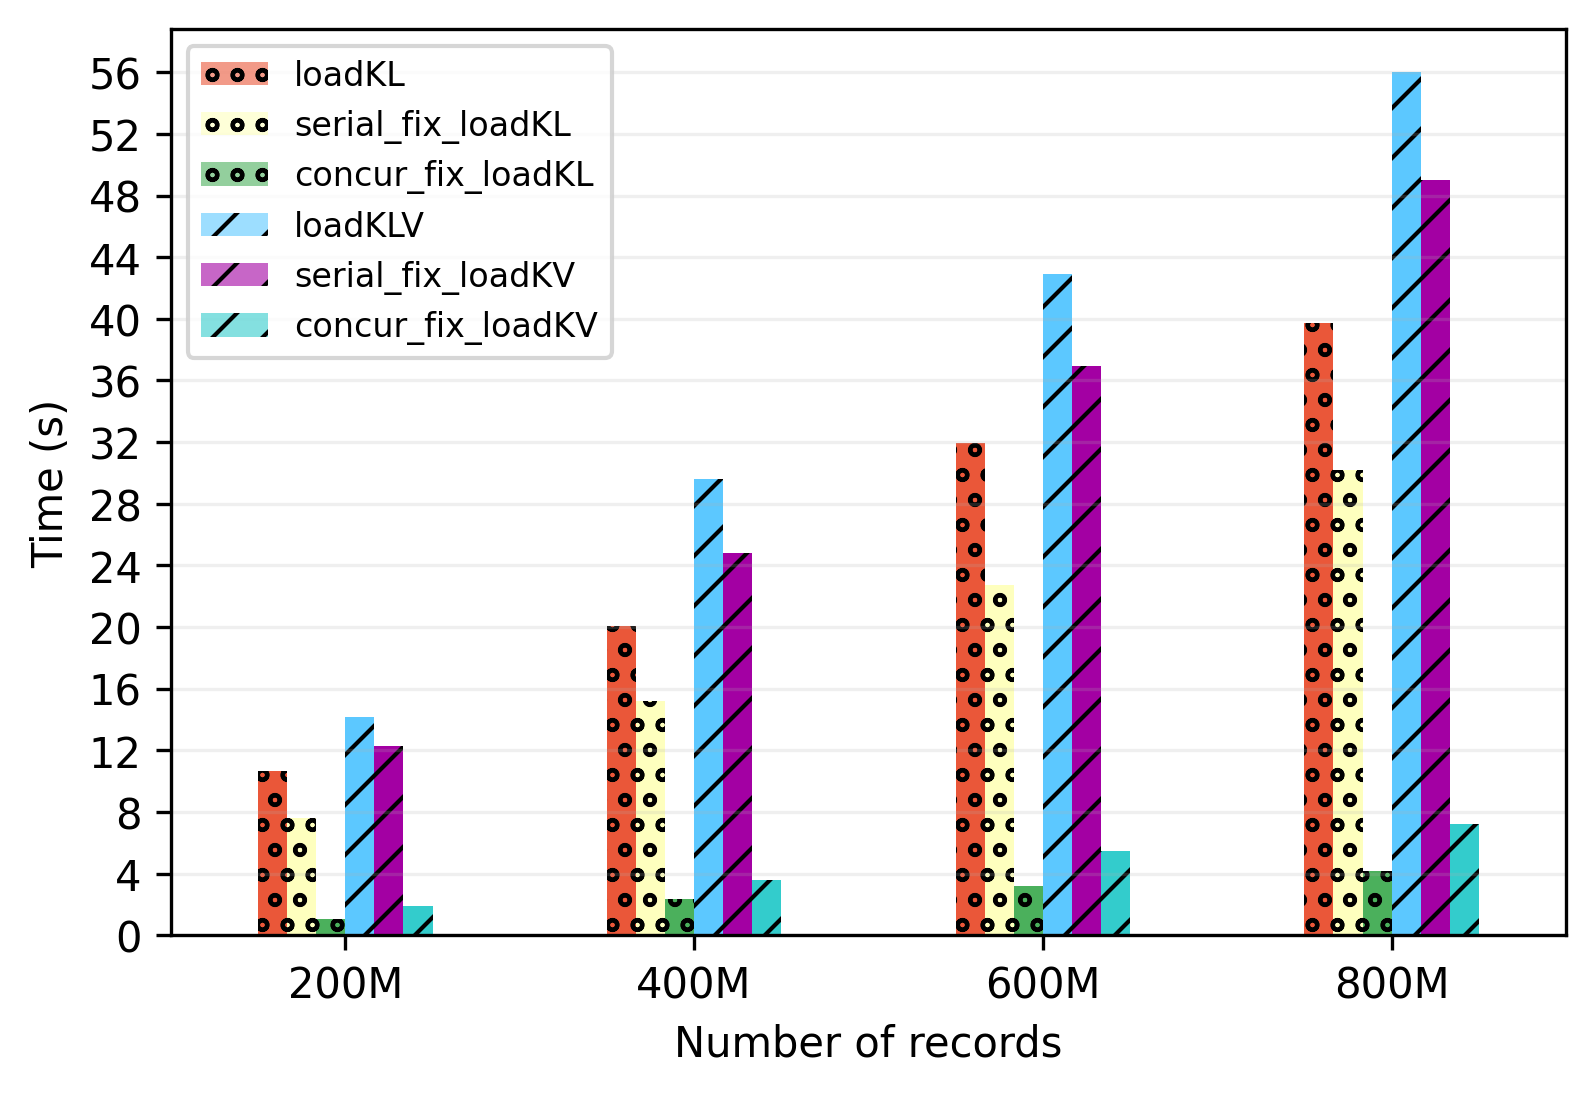

In [57]:
sizes = ("200M", "400M", "600M", "800M")
serial = [10.64, 20.09, 31.95, 39.74]
oSerial = [7.59, 15.17, 22.75, 30.22]
oConcurrent = [1.06, 2.32, 3.17, 4.16]
loadKLV = [14.15, 29.6, 42.92 , 56]
serial_fix_loadKV = [12.28, 24.80 , 36.92 , 49]
concur_fix_loadKV = [1.91, 3.60, 5.44, 7.19]

df = pd.DataFrame({'loadKL': serial,
                   'serial_fixed_loadKL': oSerial,
                   'concurrent_fixed_loadKL': oConcurrent,
                   'loadKLV':loadKLV,
                   'serial_fix_loadKV': serial_fix_loadKV,
                   'concur_fix_loadKV': concur_fix_loadKV}, index=sizes)
patterns =('oo', 'oo', 'oo', '//', '//', '//')
colors = ['#EA5739','#FEFFBE','#4BB05C', '#5CC8FF', '#A300A3', '#33cccc']

ax = df.plot.bar(rot=0, color=colors)
ax.set_xlabel("Number of records")
ax.set_ylabel("Time (s)")

bars = ax.patches
hatches = [p for p in patterns for i in range(len(df))]
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.set_yticks(np.arange(0, 60, 4))
ax.grid(axis='y', alpha=0.2)

a_val=0.6
circ1 = mpatches.Patch(facecolor=colors[0], alpha=a_val,hatch=r'oo',label='loadKL')
circ2 = mpatches.Patch(facecolor=colors[1], alpha=a_val,hatch=r'oo',label='serial_fix_loadKL')
circ3 = mpatches.Patch(facecolor=colors[2], alpha=a_val,hatch=r'oo',label='concur_fix_loadKL')
circ4 = mpatches.Patch(facecolor=colors[3], alpha=a_val,hatch=r'//',label='loadKLV')
circ5 = mpatches.Patch(facecolor=colors[4], alpha=a_val,hatch=r'//',label='serial_fix_loadKV')
circ6 = mpatches.Patch(facecolor=colors[5], alpha=a_val,hatch=r'//',label='concur_fix_loadKV')
plt.legend(handles=[circ1, circ2, circ3, circ4, circ5, circ6], prop={'size': 8})

#### Variable range of values with fixed number of records
100M records, 10B Keys

|V size  |0     |50%   |100% |
|--------|------|-----|------|
|100B    |5.774 |4.220|3.069 |
|200B    |15.37 |12.67|6.35  |
|300B    |16.60 |23.52|12.67 |
|400B    |20.59 |29.00|18.80 |
|500B    |21.00 |33.00|22.73 |
|1000B   |22.39 |37.06|31.90 |

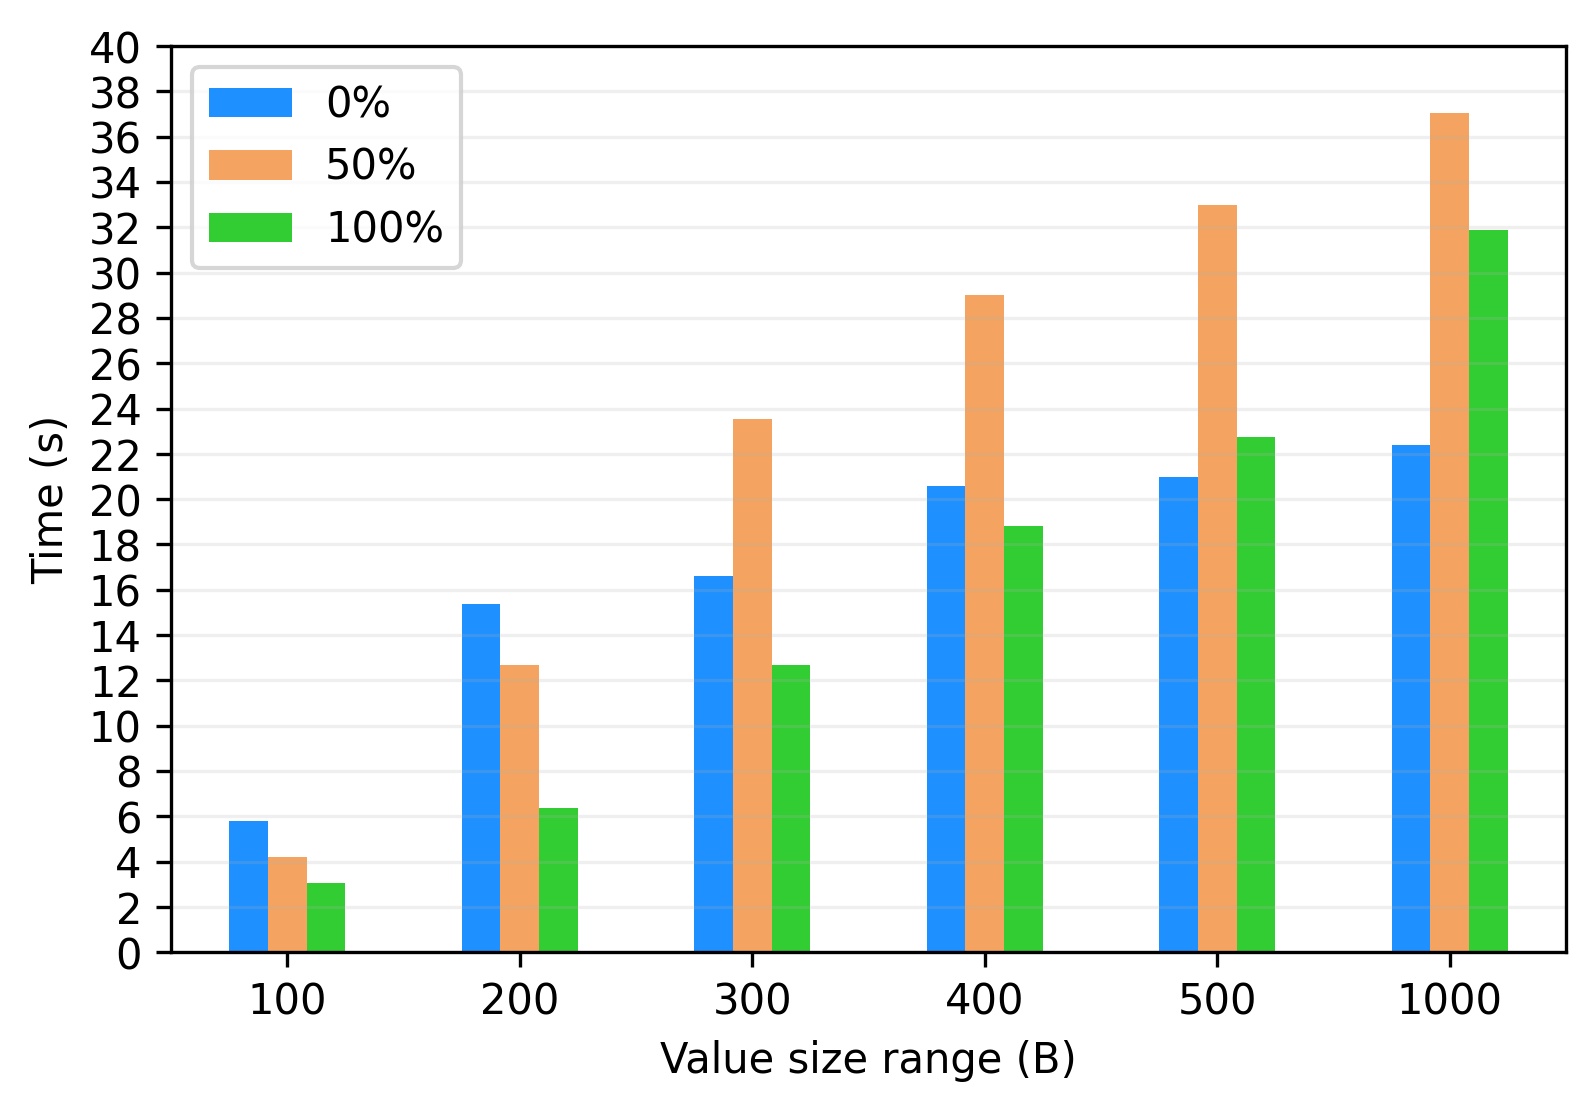

In [52]:
sizes = ("100", "200", "300", "400", "500", "1000")
zero = [5.77, 15.37, 16.60, 20.59, 21, 22.39]
fifty = [4.22, 12.67, 23.52, 29, 33, 37.06]
hundred = [3.06, 6.35, 12.67, 18.80, 22.73, 31.90]

df = pd.DataFrame({"0%": zero,
                   '50%': fifty,
                   '100%': hundred}, index=sizes)

patterns =('o', 'xx', '//')
colors = ['dodgerblue','sandybrown','limegreen']
ax = df.plot.bar(rot=0, color=colors)
ax.set_xlabel("Value size range (B)")
ax.set_ylabel("Time (s)")

# bars = ax.patches
# hatches = [p for p in patterns for i in range(len(df))]
# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)
ax.set_yticks(np.arange(0, 42, 2))
ax.grid(axis='y', alpha=0.2)

a_val=0.6
# circ1 = mpatches.Patch(facecolor=colors[0], alpha=a_val,hatch=r'o',label='0%')
# circ2 = mpatches.Patch(facecolor=colors[1], alpha=a_val,hatch=r'xx',label='50%')
# circ3 = mpatches.Patch(facecolor=colors[2], alpha=a_val,hatch=r'//',label='100%')
# plt.legend(handles=[circ1, circ2, circ3])
plt.legend()

### Add external merge sort bars to the first figure!?